<font 
color=blue>
# Project MVP - Summary
</font>

***

### Analysis of Credit Card Fraud Dateset + Predictive Model

This Notebook has the project MVP (Actually it is a little more than just an MVP).

This MVP contains:
 - [Section 1. Exploratory Data Analysis - Statistical Anlaysis](#10)
 - [Section 2. Data Preprocessing](#20)
 - [Section 3. Exloratory Data Analysis - Visualization](#30)
 - [Section 4. Summary of Findings (from EDA)](#40)
 - [Section 5. Predictive Modeling (Classification)](#50)
 - [Section 6. Summary of Findings (Predictive Modeling)](#60)
 
[Kaggle Dataset can be found here](https://www.kaggle.com/kartik2112/fraud-detection) 
  - fraudTrain.csv
  - fraudTest.csv

***
#### Remaining work for Final Submission:
Find the best classification model, and optimize it according to the selected performance metrics . Optimization can be in terms of feature selection, feature extraction, and hyperparameter tuning.

In [142]:
# Import all needed libs
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import datetime as dt
from datetime import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,f1_score, \
                            fbeta_score, roc_auc_score, precision_recall_fscore_support, confusion_matrix
import imblearn.over_sampling

%matplotlib inline

In [27]:
# Reading dataset into dataframes

# The datasets were downloaded manually from Kaggle link below
# https://www.kaggle.com/kartik2112/fraud-detection
df_Train = pd.read_csv('../project data/fraudTrain.csv')
df_Test = pd.read_csv('../project data/fraudTest.csv')

# remove the newly added first index column
df_Train = df_Train.drop(df_Train.columns[0], axis=1)
df_Test = df_Test.drop(df_Test.columns[0], axis=1)

df_Train.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

<a id="10"></a>
<font 
color=blue>
## Section 1. Exploratory Data Analysis - Statistical Anlaysis
</font>

In [28]:
#check column types and df shape

#print (df_Train.dtypes)
df_Train.info()

print("")
print(df_Train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [29]:
# check for any missing values

df_Train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [30]:
# check the basic statistics of each feature
df_Train.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [31]:
# data is biased/imbalanced as usual for financial fraud data
# fraud transactins are only 0.58% of the data

# value count for target feature
fraud_obs = df_Train['is_fraud'][df_Train.is_fraud == 1].count()
legit_obs = df_Train['is_fraud'][df_Train.is_fraud == 0].count()
all_obs = df_Train.shape[0]

# check target possible distinct values
unique_target_val = df_Train['is_fraud'].nunique()
print ("Unique target values: {}".format(unique_target_val))

print("Count of Negative target values(Legitimate): {}".format(legit_obs))
print("Count of Positive target values(Fraud): {}".format(fraud_obs))

# alternative ways to get the counts of pos/neg target values
#df_Train['is_fraud'].value_counts()  
#df_Train.groupby('is_fraud').count()

print ("Percentage of fraud observations in dataset: {:.2%}".format(fraud_obs / all_obs))

Unique target values: 2
Count of Negative target values(Legitimate): 1289169
Count of Positive target values(Fraud): 7506
Percentage of fraud observations in dataset: 0.58%


<a id="20"></a>
<font 
color=blue>
### Section 2. Data Preprocessing
</font>

In [32]:
# Convert 'trans_date_trans_time' and 'dob' columns to datetime object

df_Train['trans_date_trans_time'] = pd.to_datetime(df_Train['trans_date_trans_time'])
df_Train['dob'] = pd.to_datetime(df_Train['dob'])

df_Test['trans_date_trans_time'] = pd.to_datetime(df_Test['trans_date_trans_time'])
df_Test['dob'] = pd.to_datetime(df_Test['dob'])

In [33]:
# slice df for only the fraud transactions
# this is to explore any interesting features in the fraud observations

df_Train_fraud = df_Train[df_Train['is_fraud'] == 1]
df_Train_fraud.head()

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   
2523   2019-01-02 03:05:23  340187018810220            fraud_Goodwin-Nitzsche   
2546   2019-01-02 03:38:03    4613314721966            fraud_Erdman-Kertzmann   
2553   2019-01-02 03:55:47  340187018810220                fraud_Koepp-Parker   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2472  gas_transport   11.52  Misty    Hart      F  27954 Hall Mill Suite 575   
2523    grocery_pos  276.31  Misty    Hart      F  27954 Hall Mill Suite 575   
2546  gas_transport    7.03  Jason  Murphy      M  542 Steve Curve Suite 011   
2553    grocery_pos  275.73  Misty    Hart      F  27954 Hall Mill Suite 575   

               city  ...      lat     long  city_pop  \
2449  Collettsville  ...  35.9946 -81.7266       885   
2472    San Antonio  ...  29.4400 -98.4590   1595797   
2523    San Antonio  ...  29.4400 -98.4590   1595797   
2546  Collettsville  ...  35.9946 -81.7266       885   
2553    San Antonio  ...  29.4400 -98.4590   1595797   

                           job        dob                         trans_num  \
2449            Soil scientist 1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant 1960-10-28  bc7d41c41103877b03232f03f1f8d3f5   
2523  Horticultural consultant 1960-10-28  b98f12f4168391b2203238813df5aa8c   
2546            Soil scientist 1988-09-15  397894a5c4c02e3c61c784001f0f14e4   
2553  Horticultural consultant 1960-10-28  7863235a750d73a244c07f1fb7f0185a   

       unix_time  merch_lat  merch_long  is_fraud  
2449  1325466397  36.430124  -81.179483         1  
2472  1325468849  29.819364  -99.142791         1  
2523  1325473523  29.273085  -98.836360         1  
2546  1325475483  35.909292  -82.091010         1  
2553  1325476547  29.786426  -98.683410         1  

[5 rows x 22 columns]

<a id="30"></a>
<font 
color=blue>
### Section 3. Exloratory Data Analysis - Visualization
</font>

In [34]:
# profile data using Pandas profile
# this can be either in the Statistics or Visualization sections!

# select the columns of interest as some columns cause profile to fail!!
profile = ProfileReport(df_Train.loc[:,["amt", "category", "merchant", "dob", "job", "city_pop", 
                                        "gender", "zip", "state", "lat", "long", 
                                        "merch_lat", "merch_long", "is_fraud"]])

profile

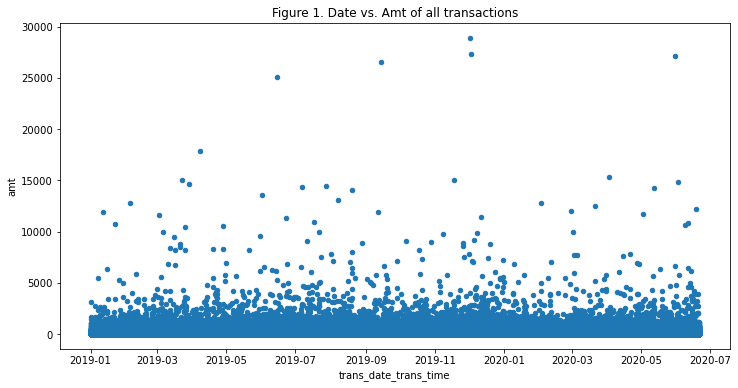

In [35]:
# chart of all data 'trans_date_trans_time' vs. 'amt'
df_Train.plot.scatter(x='trans_date_trans_time', y='amt', 
                      figsize=(12,6), title='Figure 1. Date vs. Amt of all transactions');

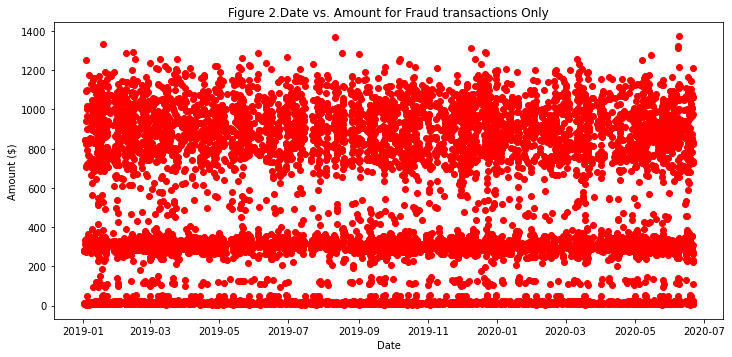

In [136]:
# chart of ONLY fraud data 'trans_date_trans_time' vs. 'amt'

plt.figure(figsize=(12,12))
ax = plt.subplot(211)

x_axis = df_Train_fraud['trans_date_trans_time']
y_axis= df_Train_fraud['amt']
ax.scatter(x_axis, y_axis, color='r', label='Transactions Time vs. Mmount ')

plt.title("Figure 2.Date vs. Amount for Fraud transactions Only")
plt.xlabel("Date")
plt.ylabel("Amount ($)")

plt.show()

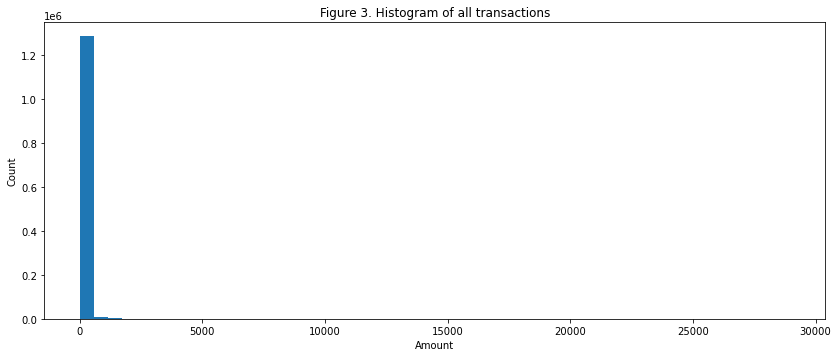

In [39]:
# histogram of all transaction 'amt'
plt.figure(figsize=(14, 12))
ax = plt.subplot(211)

bins=50

ax.hist(df_Train['amt'], bins, label='Transactions Time vs. Mmount ')

plt.title("Figure 3. Histogram of all transactions")
plt.xlabel("Amount")
plt.ylabel("Count")

plt.show()

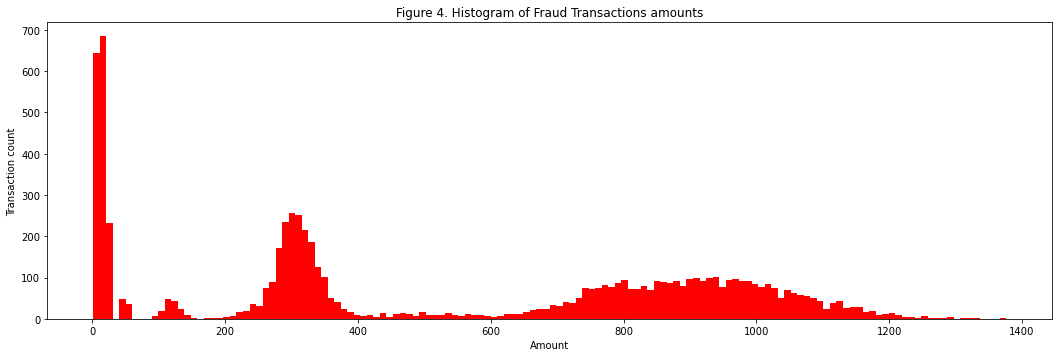

In [40]:
# histogram of ONLY fraud data 'amt'

plt.figure(figsize=(18,12))
ax = plt.subplot(211)

bins=140

ax.hist(df_Train_fraud['amt'], bins, color='r', label='Transactions Time vs. Mmount ')

plt.title("Figure 4. Histogram of Fraud Transactions amounts")
plt.xlabel("Amount")
plt.ylabel("Transaction count")

plt.show()

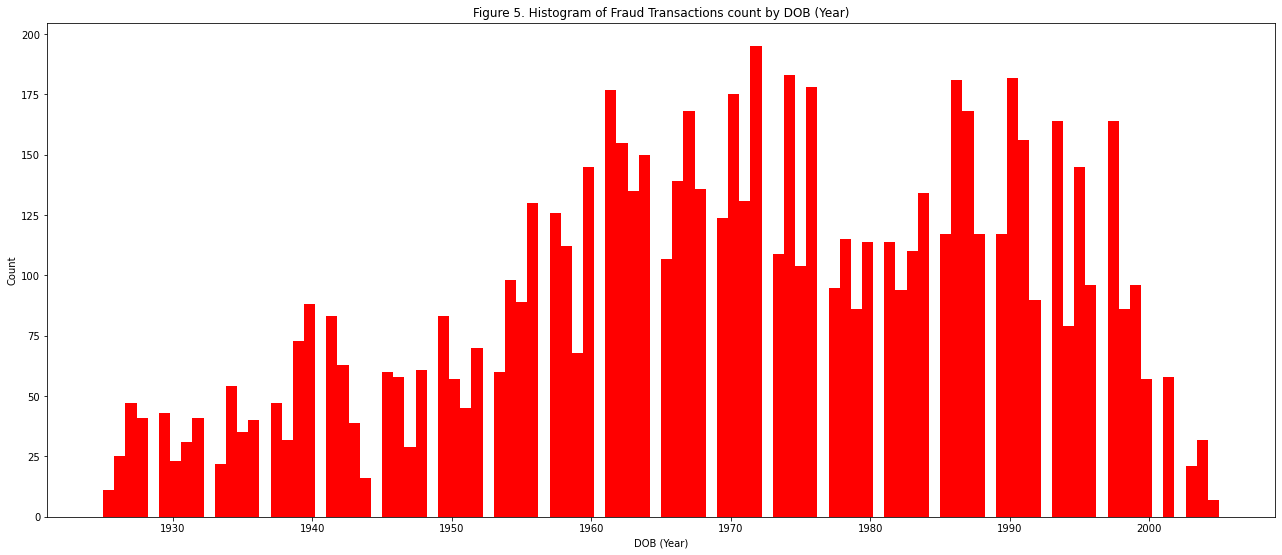

In [43]:
# chart of ONLY fraud data transactiopn count according to DOB as a histogram

plt.figure(figsize=(22,20))
ax = plt.subplot(211)

bins=100

ax.hist(df_Train_fraud['dob'].dt.year, bins, color='r', label='Transactions Time vs. Mmount ')

plt.title("Figure 5. Histogram of Fraud Transactions count by DOB (Year)")
plt.xlabel("DOB (Year)")
plt.ylabel("Count")

plt.show()

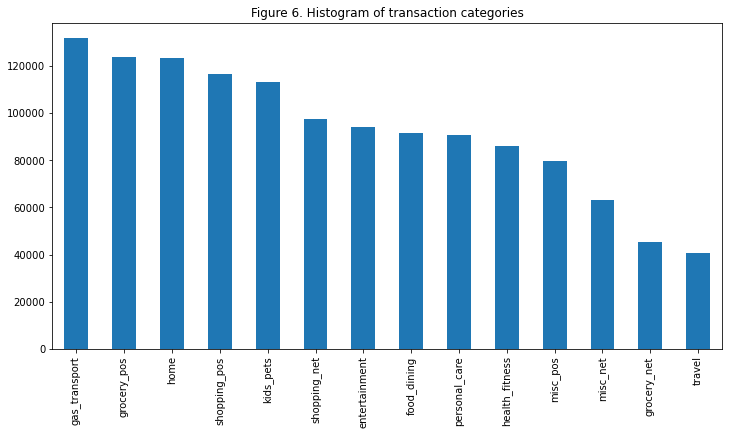

In [44]:
# bar plot for categorical feature 'category'

df_Train['category'].value_counts().plot.bar(figsize=(12,6),
                    title="Figure 6. Histogram of transaction categories");

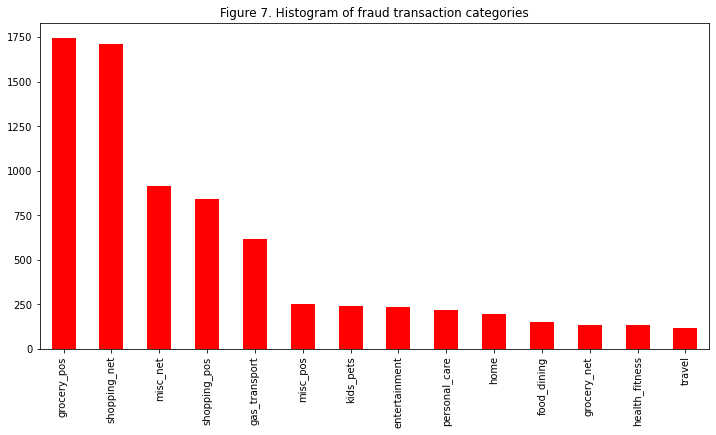

In [45]:
# bar plot for 'category' of only Fraud transaction

df_Train_fraud['category'].value_counts().plot.bar(figsize=(12,6), color='r',
                title="Figure 7. Histogram of fraud transaction categories");

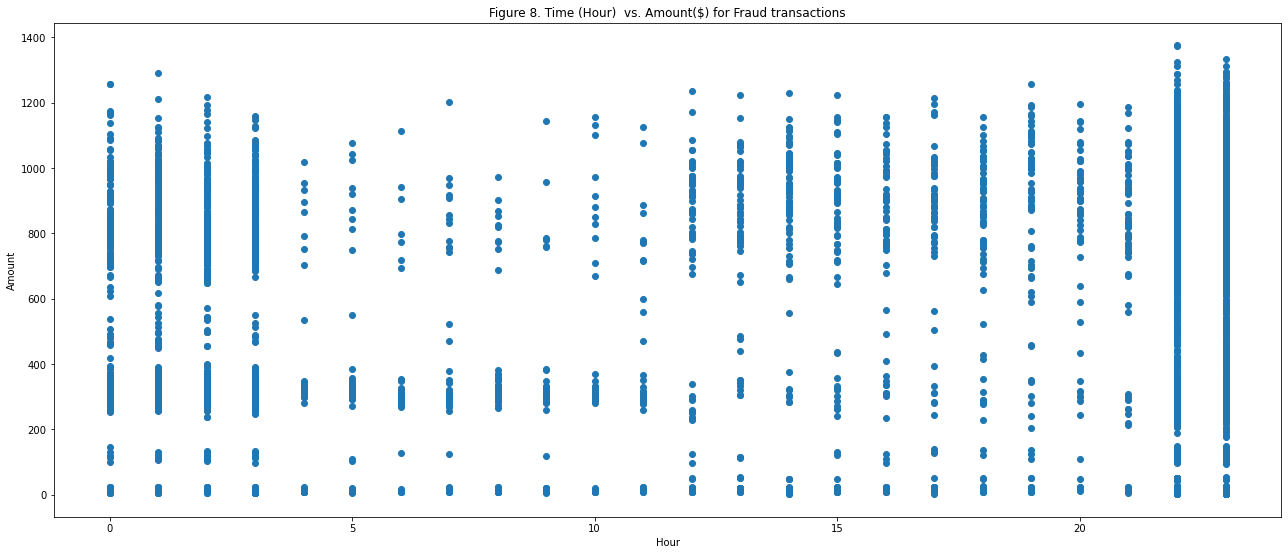

In [46]:
# Chart of fraud data Time/Hour vs. Amount

plt.figure(figsize=(22,20))
ax = plt.subplot(211)

x_axis = df_Train_fraud['trans_date_trans_time'].dt.hour
y_axis = df_Train_fraud['amt']
ax.scatter(x_axis, y_axis, label='Transactions Time (Hour) vs. Amount ')

plt.title("Figure 8. Time (Hour)  vs. Amount($) for Fraud transactions")
plt.xlabel("Hour")
plt.ylabel("Amount")

plt.show()

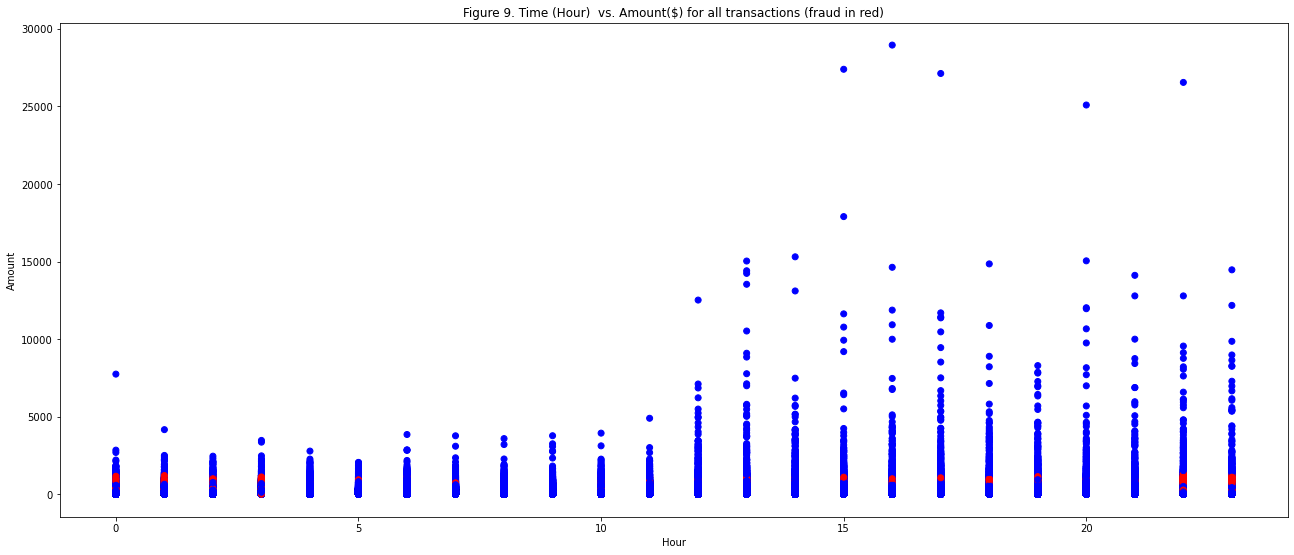

In [47]:
# Chart of all data Time/Hour vs. Amount, with the fraud data tansactions in Red color
plt.figure(figsize=(22,20))
ax = plt.subplot(211)

colormap = np.array(['b', 'r'])
colors = df_Train['is_fraud']
x_axis = df_Train['trans_date_trans_time'].dt.hour
ax.scatter(x_axis, df_Train['amt'], c=colormap[colors], label='Transactions Time vs. Amount ')

plt.title("Figure 9. Time (Hour)  vs. Amount($) for all transactions (fraud in red)")
plt.xlabel("Hour")
plt.ylabel("Amount")

plt.show()

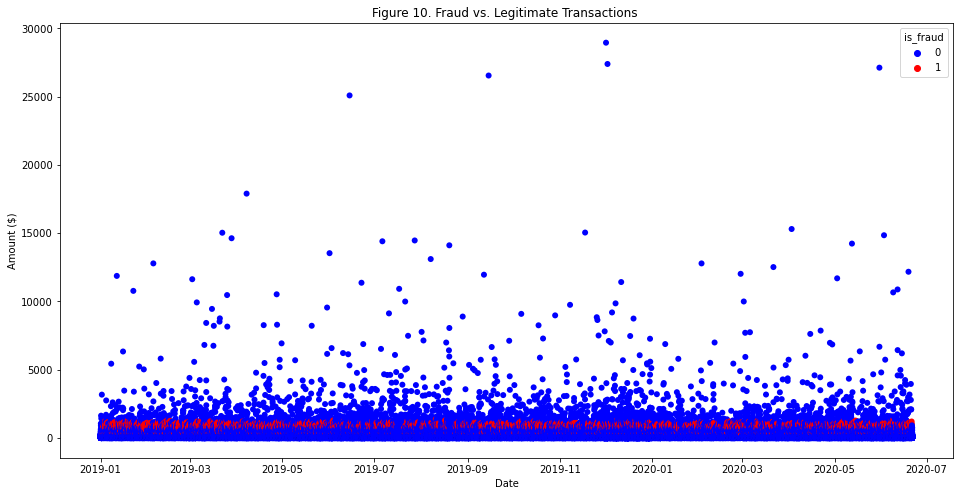

In [121]:
# Chart of Date vs. Amount, with the fraud data tansactions in Red color

sns.color_palette("dark")
plt.figure(figsize=(16,8))
plt.title("Figure 10. Fraud vs. Legitimate Transactions ")
plt.xlabel("Date")
plt.ylabel("Amount ($)")

#legend = ax.legend(handles=[df_Train['is_fraud']], labels=['Fraud', 'Legit'])
#ax.add_artist(legend)
#plt.legend(title='is_fraud', loc='upper left', labels=['Fraud', 'Legit'])

sns.scatterplot(x=x_axis, y=y_axis, hue=colors, linewidth=0, alpha = 1.0, palette=['blue', 'red'], \
                edgecolor="none")
plt.show()

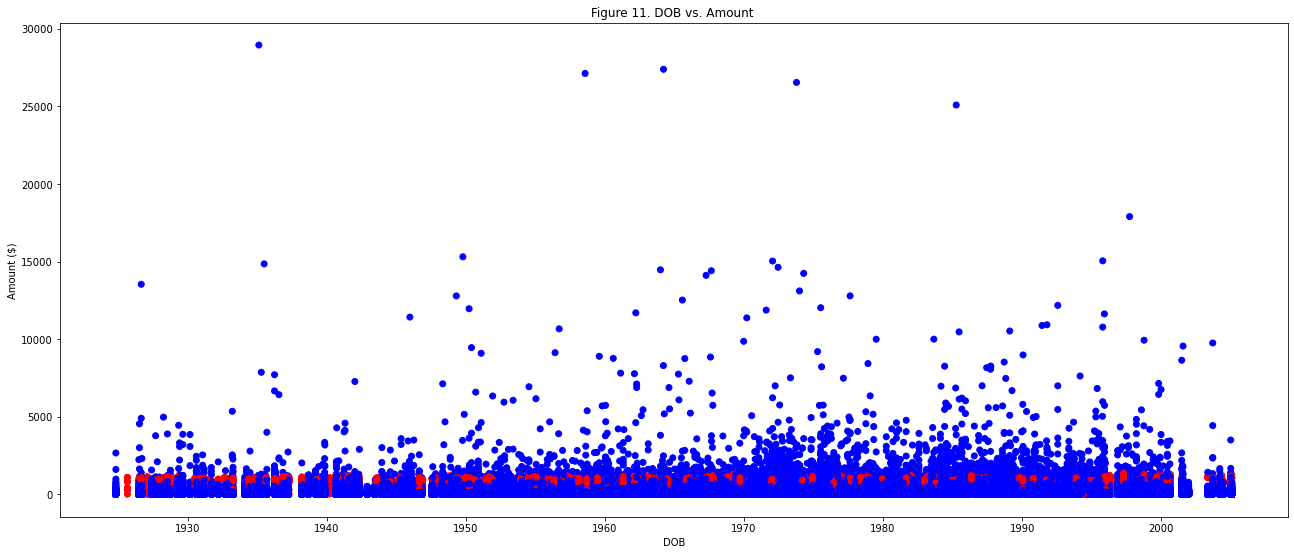

In [123]:
# Chart of DOB vs. Amount, with the fraud data tansactions in Red color

plt.figure(figsize=(22,20))
ax = plt.subplot(211)

colormap = np.array(['b', 'r'])
colors = df_Train['is_fraud']
x_axis = df_Train['dob']
y_axis= df_Train['amt']
ax.scatter(x_axis, y_axis, c=colormap[colors], label='Transactions Time vs. Mmount ')

plt.title("Figure 11. DOB vs. Amount ")
plt.xlabel("DOB")
plt.ylabel("Amount ($)")

plt.show()

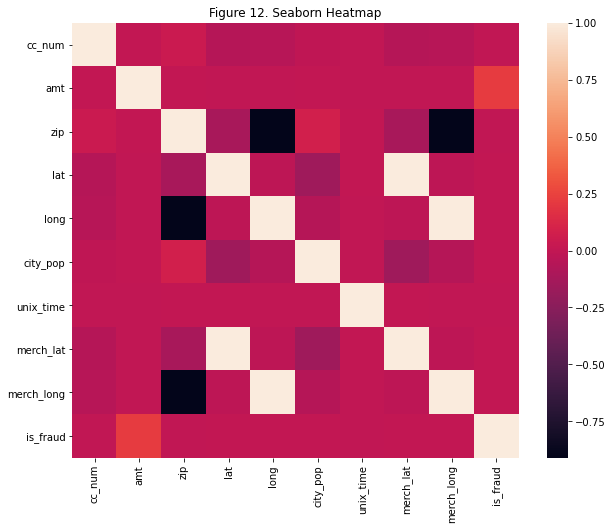

In [132]:
# sns heatmap of all features

Train_corr = df_Train.corr()
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Figure 12. Seaborn Heatmap")


sns.heatmap(Train_corr);

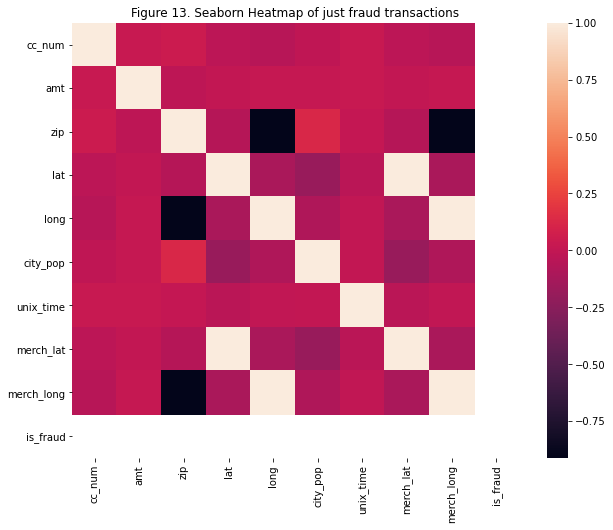

In [133]:
# sns heatmap of fraud transactions


Train_corr = df_Train_fraud.corr()

fig, ax = plt.subplots(figsize=(10,8))
plt.title("Figure 13. Seaborn Heatmap of just fraud transactions")

sns.heatmap(Train_corr);

<a id="40"></a>
<font 
color=blue>
### Section 4. Summary of Findings (from EDA)
</font>

- From Figures (8, 9),  we can see that fraud transaction occur mostly off-hours, between 3pm - 3am, but the majority of them occur between 10pm - 3am daily.  This is when card owners are likely sleeping and therefore will not react quickly to the charges giving the criminals more time for making extra charges on the stolen cards.


- From Figures (2,3,4), we can see that fraud transactions occur in specific amount bands, such as:
    $\$$1-20, $\$$200-400, and $\$$700-1200, and the majority of farud transactions are in the $\$$1-20.  Figure 3 shows that the majority of charge amount is actualy between $\$$0-2, which can be interpreted as criminals testing the stolen cards first with small amount to make sure the credit card is valid and active.  This is an interesting behaviour that the model should be able to learn from to predict fraudulent transactions.  Also the all fraud transaction amount did not exceed about 1500, which is about the check amount for pensioners, so as not to run over their monthly income (Very considerate criminals :) )


- From Figure 11, we can see a very interesting behaviour especially for senior citizens that there are only fraud transactions against their credit cards!! This could be a scam where scammers through phishing can get credit card companies to issue cards for senior citizens without their knowledge (mail credit card scams, or phishing for their personal data and using it to request a reissue of their credit cards).  This may also mean that there are fraud credit card charges for some people taht have already passed away! (birth year was around 1925).


- Figure 5 shows that criminals do not discriminate against age of victims, they will hit anyone they can, but frequency of the age of the victims are mostly centered around middle age people, which makes sense as they are probably spending more and therefore using their credit cards more than the other age groups.


- Figure 7 shows that the majority of the categories that criminals bought using the stolen credit cards are either "grocery_pos" and "shopping_net'.  So criminals are using these stolen credit cards to buy their groceries in with Point of Sale machines/casheris (in-person shopping).  I found this behaviour surprising as I thought it will be mostly internet shopping (e-commerce, but this is the next most common category.



- From Figure (12,13) there does not seem to be a high correlation between features and the target.


- Before converting 'trans_date_trans_time' to datetime object, plotting using this feature took a lot of time and memory resources!


- I started plotting using Plotly which generates interactive charts.  THe charts generated using plotly once generated consumed heavy memory resources which eventually caused may laptop to freeze.  I then switched to matplotlib/Seaborn.


<a id="50"></a>
<font 
color=blue>
### Section 5. Predictive Modeling (Classification)
</font>

 - Created 2 Classification Models (Logistic Regression, and Random Forests)
 - The main Model performance metrics will be Precision/Recall/F1 as the dataset used is highly imbalanced/biased)

In [138]:
# Create train/test split

# first combine the train and test data so we can split it as we wish
df_all = pd.concat([df_Train,df_Test], axis=0)

X = df_all.drop(['is_fraud'], axis=1)
y = df_all.pop('is_fraud')

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [144]:
# create function to output the metrics of interest

def print_metrics(model_name):
    print ('{} Metrics: '.format(model_name))
    print ('====================')

    # Accuracy = (TP+TN)/(TP+FP+FN+TN)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy: %f' % accuracy)
    #print("Accuracy for {} is: {:.6f}".format(model, accuracy))

    # Precision = TP/(TP+FP)
    precision = precision_score(y_test, y_predict)
    print('Precision: %f' % precision)

    # Recall = TP/(TP+FN)
    recall = recall_score(y_test, y_predict)
    print('Recall: %f' % recall)

    # F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    f1 = f1_score(y_test, y_predict)
    print('F1 score: %f' % f1)

In [145]:
# define function to plot the confusion matric
# I am using this from class-provided notebooks

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_subset)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [151]:
# Use Logistic Regression and output accuracy

# create just a subset of the df with the categories of interest only
X_train_subset = X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
X_test_subset = X_test[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]

clf_lr = LogisticRegression(random_state=0).fit(X_train_subset, y_train)

y_predict = clf_lr.predict(X_test_subset)
clf_lr.predict_proba(X_test_subset)

clf_lr.score(X_train_subset, y_train)
print("Logistic score: {:6.4f}".format(clf_lr.score(X_train_subset,y_train)))

Logistic score: 0.9948


In [152]:
# output the confusion matrix

f1_score(y_test, y_predict)
confusion_matrix(y_test, y_predict)

# also print of the metrics for lr
print_metrics('Logistic Regression')

Logistic Regression Metrics: 
Accuracy: 0.994799
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/Users/zaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


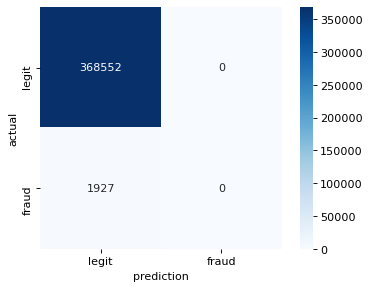

In [146]:
# plot the confusion matrix

make_confusion_matrix(clf_lr)

In [147]:
# create a Random Forest model

clf_rf = RandomForestClassifier(random_state=10)
clf_rf.fit(X_train_subset, y_train)

RandomForestClassifier(random_state=10)

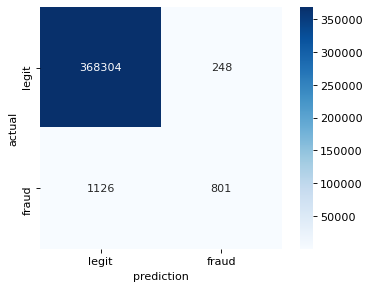

In [149]:
# predift and get metrics of rf

y_predict = clf_rf.predict(X_test_subset)
f1_score(y_test, y_predict)
confusion_matrix(y_test, y_predict)

make_confusion_matrix(clf_rf)

In [150]:
# also do a print of the metrics for rf

print_metrics('Random Forest')

Random Forest Metrics: 
Accuracy: 0.996280
Precision: 0.770977
Recall: 0.405293
F1 score: 0.531293


<a id="60"></a>
<font 
color=blue>
### Section 6. Summary of Findings (Predictive Modeling)
</font>

- The Model accuracy is too high  in the case of Linear Regression -> Too good to be true!


- Linear Regression accuracy is high because the test dataset is imbalanced, so even if we guess that all transactions are legitimate (not fraud), thwn we will still get high accuracy.


- So when we need other metrics of model performance, mainly we will use the Precision/Recall/F1 Score in this case due to the imbalanced dataset.


- Once we do that, we find out the Linear Regression Precision/Recall/F1 are all zero, mostly because the True Positive that has been predicted by LR is zero, whicj means that LR was not able to guess any of the fraud cases...this is a very very Bad model.


- Next, we try Random Forests, and as we can see it has a relatively good Precision/Recall and F1 balance.


- This just proves the concepty for this MVP, and I will elaborate on this further in the Final project